## Alunos

- Andreus Jartã Timm
- Kesley Jorge dos Santos
- Priscila Alvez Costa

# Trabalho Prático
-------------

**Objetivo**: Nosso objetivo é treinar os modelos aprendidos em sala de aula e ver qual
modelo é o mais eficaz neste dataset

**Banco de Dados**: Bank Loan Approval

[Link para o banco](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc)

Descrição do banco:
> Este banco de dados contem registros de 5000 usuários de banco, e a informação se o empréstimo foi aprovado está  na coluna `Personal Loan`.
> 
> O banco de dados possui 14 variáveis:
> 
> * `ID`: ID do cliente
> * `Age`: Idade do cliente
> * `Experience`: Experiência do cliente
> * `Income`: Renda do cliente
> * `ZipCode`: CEP de residência do cliente
> * `Family`: Número de membros da família do cliente
> * `CCAvg`: Pontuação média do cartão de crédito
> * `Education`: Educação do cliente
> * `Mortgage`: Hipoteca contratada ou não pelo cliente
> * `Personal Loan`: 0 significa Empréstimo pessoal não concedido, 1 significa Empréstimo pessoal concedido
> * `Securities Account`: Se o cliente possui ou não uma conta de títulos
> * `CD Account`: Possui ou não possui uma conta de certificado de depósitos CD é uma ferramenta de poupança de baixo risco
> * `Online`: Possui ou não possui banco online
> * `Credit Card`: Possui ou não possui um cartão de crédito

### 1. Carga do banco
--------------------

In [313]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, roc_curve, RocCurveDisplay
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



df = pd.read_csv('../dataset/bankloan.csv')

### 1.1 - Exibir as primeiras linhas do DataFrame

In [314]:
print(df.head())

   ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


### 1.2 - Exibir as ultimas linhas do DataFrame

In [315]:
print(df.tail())

        ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal.Loan  Securities.Account  CD.Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           

### 1.3 Remoção o ID que é desnecessário

In [317]:
df = df.drop(columns=['ID', 'ZIP.Code'])

### 1.4 Visualização da alteração

In [318]:
print(df.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal.Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities.Account  CD.Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


### 1.5 - Analisar as features descritivas

In [319]:
print(df.describe())

               Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200     2.396400     1.937938   
std      11.463166    11.467954    46.033729     1.147663     1.747659   
min      23.000000    -3.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

         Education     Mortgage  Personal.Loan  Securities.Account  \
count  5000.000000  5000.000000    5000.000000         5000.000000   
mean      1.881000    56.498800       0.096000            0.104400   
std       0.839869   101.713802       0.294621            0.305809   
min       1.000000     0.000000       0.000000       

### 1.6 - Verificando dados faltantes

In [320]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

### 1.6 - Verificando dados duplicados

In [321]:
df.duplicated().sum()

13

In [322]:
df.shape

(5000, 12)

## 2. Quebra do banco
--------------------

### 2.1 - Separando os dados entre features (X) e target (y)

In [323]:
X = df.drop(columns=['Personal.Loan'])
y = df['Personal.Loan']

### 2.2 - Separar o conjunto de dados em treino (80%) e teste (20%)

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3 Fazendo a normalização dos dados

In [325]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Primeiro modelo
--------------------

### 3.1 Regressão logistica

In [326]:
log_reg = LogisticRegression( random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [327]:
pred_class = log_reg.predict(X_test_scaled)

In [328]:
# Fazer previsões e avaliar o modelo
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log_reg))



Regressão Logística
Acurácia: 0.955
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.86      0.69      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.84      0.87      1000
weighted avg       0.95      0.95      0.95      1000



Matriz de confusão


||Classificado 0|Classificado 1|
|---|---|---|
|Real 0| 884| 22|
|Real 1| 34| 71|

Precisao 0 = 884/(884+34)

Recall 0 = 884/(884+22)

In [ ]:
884/(884+34), 884/(884+22)

(0.9629629629629629, 0.9757174392935982)

In [ ]:
recall_score(y_test, pred_class)

0.6761904761904762

In [ ]:
recall_score(y_test, pred_class, pos_label=0)

0.9877094972067039

In [ ]:
pred_prob = log_reg.predict_proba(X_test_scaled)

In [ ]:
roc_auc = roc_auc_score(y_test, pred_prob[:, 1])
roc_auc

0.967757382282522

In [ ]:
pred_prob[1, :]

array([0.73821951, 0.26178049])

In [ ]:
(pred_prob[:,1] > .5) - pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

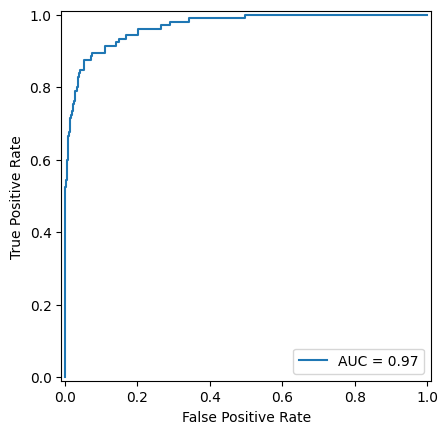

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [ ]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
predict_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
acc_atual = 0
thr_otimo = 0

In [ ]:
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(y_test, predict_proba>=thr)
  print(f'Limiar: {thr}, acuracia: {acc}')
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

Limiar: 0.0, acuracia: 0.105
Limiar: 0.1, acuracia: 0.89
Limiar: 0.2, acuracia: 0.935
Limiar: 0.30000000000000004, acuracia: 0.95
Limiar: 0.4, acuracia: 0.955
Limiar: 0.5, acuracia: 0.955
Limiar: 0.6000000000000001, acuracia: 0.95
Limiar: 0.7000000000000001, acuracia: 0.949
Limiar: 0.8, acuracia: 0.936
Limiar: 0.9, acuracia: 0.929


In [ ]:
import plotly.express as px

acc_lista = []
for thr in np.arange(0, 1, .0001):
  acc_lista.append(accuracy_score(y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .0001), y=acc_lista)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score


predict_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
row = []
for thr in np.arange(0, 1, .001):
  pre = precision_score(y_test, predict_proba>thr)
  rec = recall_score(y_test, predict_proba>thr)
  f1 = f1_score(y_test, predict_proba>thr)

  row.append((thr, pre, rec, f1))

df = pd.DataFrame(row, columns=['thr', 'pre', 'rec', 'f1'])
px.line(df, x='thr', y=['pre', 'rec', 'f1'])

c:\Users\Kesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
predict_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
row = []
for thr in np.arange(0, 1, .01):
  pre = precision_score(y_test, predict_proba>thr, pos_label=0)
  rec = recall_score(y_test, predict_proba>thr, pos_label=0)
  f1 = f1_score(y_test, predict_proba>thr, pos_label=0)

  row.append((thr, pre, rec, f1))

df = pd.DataFrame(row, columns=['thr', 'pre', 'rec', 'f1'])
px.line(df, x='thr', y=['pre', 'rec', 'f1'])

c:\Users\Kesley\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



### 3.2 Arvore de decisão

In [ ]:
# Modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_dt = dt_model.predict(X_test)
print("\nÁrvore de Decisão")
print("Acurácia:", accuracy_score(y_test, y_pred_dt))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_dt))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_dt))


Árvore de Decisão
Acurácia: 0.986
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.91      0.93       105

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Matriz de Confusão:
 [[890   5]
 [  9  96]]


### 3.3 Random Forest

In [ ]:
# Modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest
Acurácia: 0.99
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.92      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000

Matriz de Confusão:
 [[893   2]
 [  8  97]]


### 3.4 XGBoost

In [ ]:
# Modelo de Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões e avaliar o modelo
y_pred_gb = gb_model.predict(X_test)
print("\nGradient Boosting")
print("Acurácia:", accuracy_score(y_test, y_pred_gb))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_gb))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting
Acurácia: 0.992
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.99      0.93      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Matriz de Confusão:
 [[894   1]
 [  7  98]]
